# Mfundo Monchwe
## 20172604
##Advanced Machine Learning
**Problem Statement**

Our start-up company has identified a market for developing Machine Learning Web Applications, which are accessible to every person on a mobile phone. One of the high-priority areas for the start-up is to solve health-related challenges by building a web-based machine learning solution which can help health practitioners solve the problem of Heart Disease Diagnosis.

**Research Questions**
1. which model is appropriate to predict whether patient is sick or not
2. how are we gonna split the dataset?
3. Which one of the functional requirements to perform diagonsis?
4. how can the clients trust this model?
5. How do we choose our priors?
6. which Probability Distribution will selected for modelling?

**Objectives**
1. Probabilistic Machine Model

Using Bayesian Formula:

$P(\theta|D)$ $=$ $\frac{P(\theta)P(D|\theta)} {P(D)}$

Where $P(\theta|D)$ ~ $Posterior$   $for$ $\theta$ $given$ $D$ $and$ $P(D|\theta)$ $~ Likelihood for$ $\theta$ 

$P(\theta)$ ~ $for$ $\theta$ and $P(D)$ $~$ 

Evidence of the model which we can simplify it as as:

$P(Model|Data)$ $=$ $\frac{P(Model)P(Data|Model)} {P(Data)}$

Model selection will be informed by the principle of Occam's Razor by selecting the easiest model that best explains the relation between the features $x_is$ and target variable $y_i$

$P(Model_i|Data)$ =$\frac{P(Model_i)P(Data|Model_i)} {P(Data)}$ 


The final selected model will be used to predict whether the patient is sick or not with the quantification of the uncertainty of the model which also can be simplified as:

$P(y_i|data,\theta)$ = $\int P(y_i|data,\theta)P(\theta|data)d\theta$ 




2. Splitting the dataset into 80% training and 20% test

There are 4 important steps for pre-processing data


*   Split the data set in Training and Validation sets
*   if there are missing values we take care of them
*   Taking care of Categorical Features
*   We Normalize the dataset

3.  Using  $X_is$ and $Y_i$
4. we will trace the model using arviz to check how uncertain and certain our model is
5. will be answered during the process
6. Bernoulli Distribution since we have two ouputs 1 Sick or 0 not sick





In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano as T
import arviz as az
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
from pymc3.variational.callbacks import CheckParametersConvergence


In [2]:
model_path = Path('models')
for p in [model_path]:
  if not p.exists():
    p.mkdir()

# Introduction to Heart Dataset
## Dataset Information
This dataset contains 76 attribtues, but it was brought down to subset of 14 of them.
The goal of this project is to find the presence of heartdisease in the patient.
It is integer valued from 0( no presence) to 4.

**Attribute Information:**
Only 14 Attribues used:
1. #3 (age)
2. #4 (sex) (1 = male; 0 = female)
3. #9 (cp): chest pain type


*   Value 1: typical angina
*   Value 2: atypical angina
*   Value 3: non-anginal pain
*   Value 4: asymptomatic


4. #10 (trestbps): resting blood pressure(in mm Hg on admission to the hospital)
5. #12 (chol): serum cholestoral in mg/dl
6. #16 (fbs):(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg): resting electrocadiographic results
* Value 0: normal
* Value 1:  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): Maximum heart rate achieved
9. #38 (exang): exercise induced angina (1 = yes; 0= no)
10. #40 (oldpeak): ST depression induced by exercise relative to rest
11. #41 (slope): the slope of the peak exercise ST segment
* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping
12. #44 (ca): number of major vessels (0-3) colored by flourosopy
13. #51 (thal): (3=normal; 6= fixed defect; 7 = reversable defect)
14. #58 (num) (the predicted attribute)


num: diagnosis of heart diseae (angiographic disease status)
* Value 0: < 50% diameter narrowing
* Value 1: > 50% diameter narrowing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv


# Exploratory Data Analysis (EDA)
EDA is an approach to analyzing datasets and summarizing their characteristics with visual methods.
another we can define EDA is that it is a pre-processing step to understand our data, although we understand that there are many ways (or techniques) and step in performing EDA, however, numeroous of them are specific in focusing on either visualizatin or distribution, and are incomplete.
EDA is used for seeking what the data can tell us before we performe the modelling task. it is not a easy job to search through column numbers or a whole spreadsheet and determine very important characteristics of the data. this may be exhausting and boring to derive insighs by looking at plain digits.



In [4]:
dt = pd.read_csv('Heart.csv', delimiter=';')
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
dt.shape

(303, 14)

In [6]:
dt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


given the info above we have 3 variable types:


1.   Binary: sex, fbs, exang, target
2.   Categorical: cp, restecg, slope,ca,thal
3. Continuous: age, trestbps, chol, thalach, oldpeak



In [8]:
#checking the type of variable
dt.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
dt.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:

dt['ca'].unique()

array([0, 2, 1, 3, 4])

In [11]:
#counting the number in  of each category descending order
dt.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [12]:
#finding row '4'
dt[dt['ca']==4]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [13]:
dt.loc[dt['ca']==4, 'ca'] = np.NaN

In [14]:
dt['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [15]:
dt.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [16]:
dt.loc[dt['thal']==0, 'thal'] = np.NaN

In [17]:
dt[dt['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [18]:
dt['thal'].unique()

array([ 1.,  2.,  3., nan])

In [19]:
#Checking missing values
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [20]:
import missingno as msno # visualize missing values

# Missingno Library
Basically what the library does is visualize the missing values which are presented by the horizontal lines, this library also provide us with informative way of visualizing the missing values located in each column, and check whether there is any correlation between missing vales of different columns.

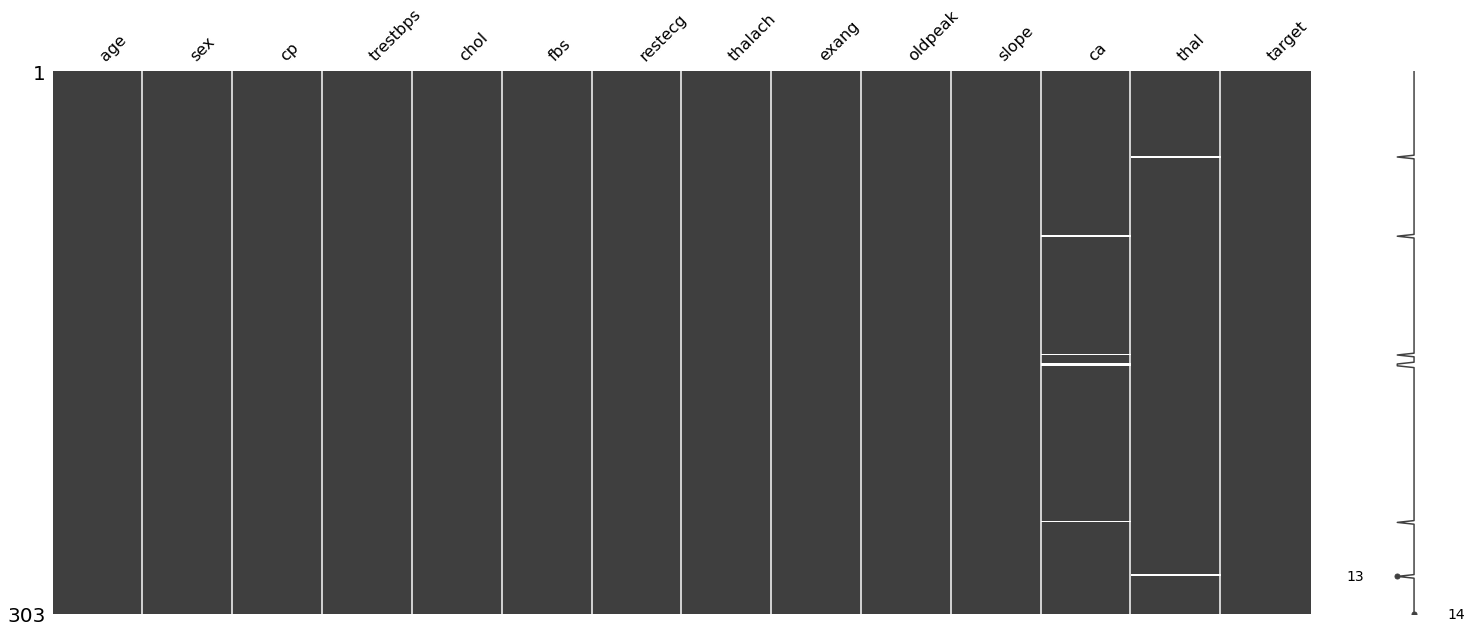

In [21]:
msno.matrix(dt)

given the above , we can replace NaN with median

In [22]:
dt = dt.fillna(dt.median())
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Next  step to check duplicate rows


In [23]:
duplicated = dt.duplicated().sum()
if duplicated:
  print('you have duplicates rows in the dataset which are: {}'.format(duplicated))
else:
  print('the dataset does not contain any duplicate value')  

you have duplicates rows in the dataset which are: 1


In [24]:
duplicated = dt[dt.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


# Statistics summary


In [25]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Given the information above, we deduce observed the following information
1. sex (0-1)

min = 0, max =1, mean = 0.683168, q1 = 0, q3 = 1, std = 0.466011
2. cp (0-3)

min = 0, max= 3, mean = 0.966997, q1 = 0, q3 = 2, std = 0
3. fbs (0-1)

min = 0, max = 1, mean = 0.148515, q1=0, q3=0, std = 0.356198
4. restceg (0-2)

min =0, max =2, mean =0.528053, q1 =0, q3=1, std = 0.525860 
5. exang (0-1)

min = 0, max = 1, mean = 0.326733, q1= 0, q3 = 1, std = 0.469794
6. slope (0-2)

min = 0, max = 2, mean = 1.399340, q1 = 1, q3=2, std =0.616226

7. ca(0-3)

min = 0, max =3, mean = 0.663366, q1 =0, q3=1, std =0.934375
8. thal (0-3)

min =1, max=3, mean= 2.326733, q1 =1, q3=3, std=0.583020


In [26]:
dt_vz=dt.copy()

In [27]:
dt['target'] = dt.target.replace({1: "Disease", 0: "No_disease"})
dt['sex'] = dt.sex.replace({1: "Male", 0: "Female"})
dt['cp'] = dt.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
dt['exang'] = dt.exang.replace({1: "Yes", 0: "No"})
dt['fbs'] = dt.fbs.replace({1: "True", 0: "False"})
dt['slope'] = dt.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
dt['thal'] = dt.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

# Outliers
removing outliers

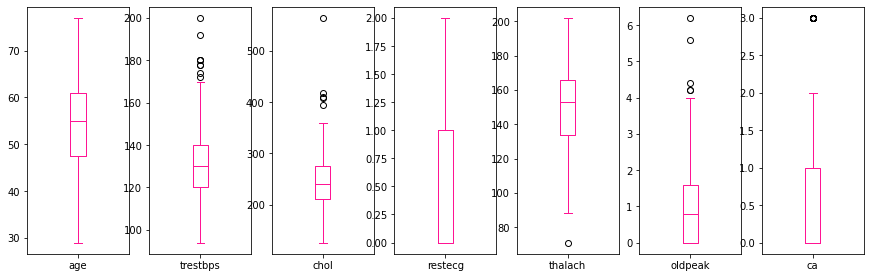

In [28]:
dt.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(15,10), 
color='deeppink');

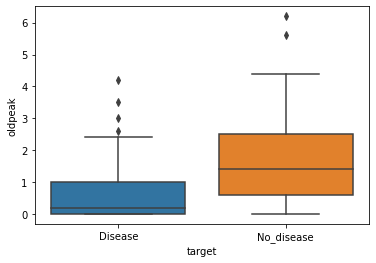

In [29]:
sns.boxplot(x='target', y='oldpeak', data= dt)

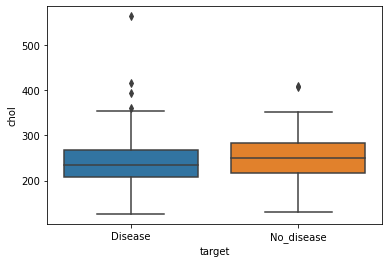

In [30]:
sns.boxplot(x='target', y ='chol', data =dt)

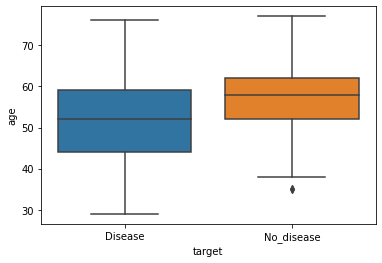

In [31]:
sns.boxplot(x='target', y='age', data=dt)

In [32]:
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(dt_out, drop = False):
    for each_feature in dt_out.columns:
        feature_data = dt_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            dt.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(dt[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [33]:
#next part is to drop outliers
outliers(dt[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


Now We move to the next section where we deal with distributions and their relationship
**target variable distribution**

Disease       159
No_disease    125
Name: target, dtype: int64


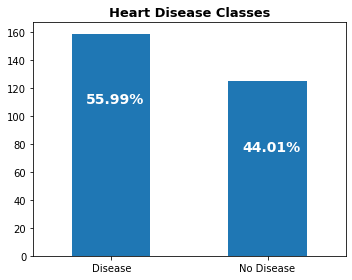

In [34]:
print(dt.target.value_counts())

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No Disease"]
ax = dt.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

given the above information, we can conclude  there are more diseased patients than healthy patients

# Age Variable distribution

Text(0.5, 1.0, 'Age Distribution')

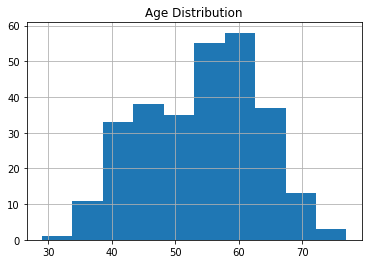

In [35]:
dt['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

we can tell from the above that age is normally distributed

58    18
57    17
54    15
52    12
59    12
44    11
51    11
60    11
41    10
62     9
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

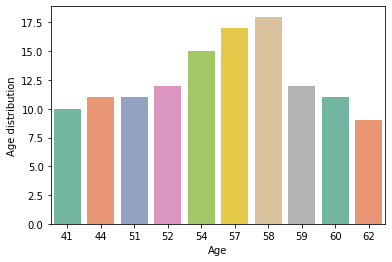

In [36]:
print(dt.age.value_counts()[:10])
sns.barplot(x=dt.age.value_counts()[:10].index,
            y=dt.age.value_counts()[:10].values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

From the given information we deduce that the most of patients are in the age between 50 to 60s.
mean age is about 54 years with$+/$ 9.08 std, the youngest is around 229 and oldest 77.
we can show that by finding min and max of age

In [37]:
print('Minimum of age:')
print(min(dt.age))
print('Maximum of age:')
print(max(dt.age))
print('Mean of the age:')
print(dt.age.mean())

Minimum of age:
29
Maximum of age:
77
Mean of the age:
53.99295774647887


# Gender distribution according ot target variable

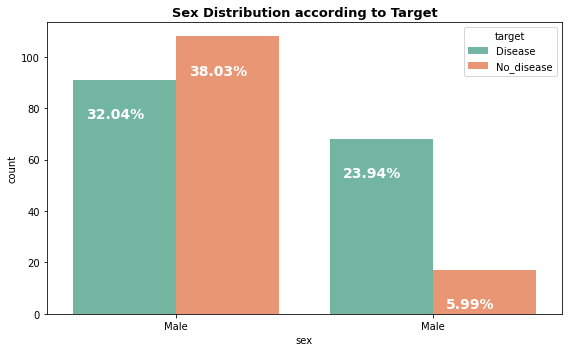

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
name = dt['sex']
ax = sns.countplot(x='sex', hue='target', data=dt, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

from bar graph we observe that among disease patients, males are more diseased than females


## Chest pain distribution according to target variable

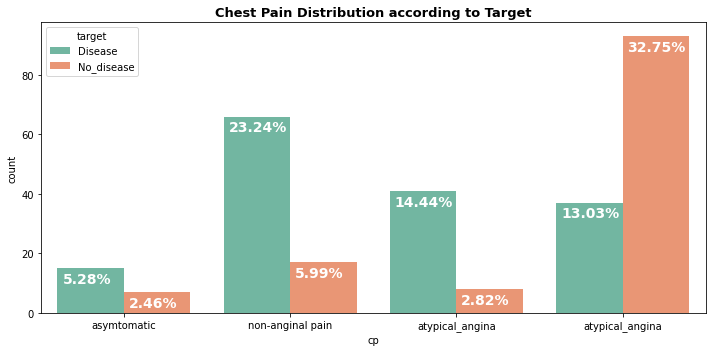

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
name = dt['cp']
ax = sns.countplot(x='cp', hue='target', data=dt, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Chest pain (cp) can be defined as a type of discomfort cuased when heart muscle doesn't receive enough oxygen rich blood, which triggered discomfort in arms,neck, shoulders etc..

given the above bar graph, most of the health subject is having chest pain, which raised a question of higher number of healthy subject to having typical_angina. Chest discomfort can be subjective owing to stress, physical activity, and a variety of other factors, and it differs by gender. Women and the elderly are more likely to develop unusual symptoms when they have a history of illness.

# Fasting Blood Sugar Distribution according to Target

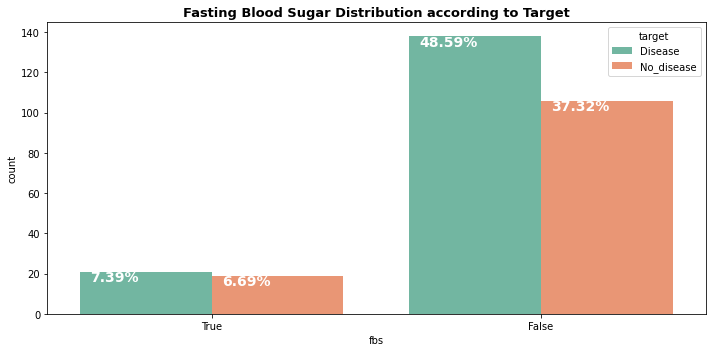

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
name = dt['fbs']
ax = sns.countplot(x='fbs', hue='target', data=dt, palette='Set2')
ax.set_title("Fasting Blood Sugar Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Fasting blood sugar (fbs) is a diabetes indicator with fbs> 120mg/d which is considered diabetic (True class). In this case, we can see that the number for class yes is smaller than the number for class false. However, if we examine closely, we can see that there are a greater proportion of heart disease patients who do not have diabetes. This suggests that fbs may not be a major characteristic distinguishing between heart disease and non-disease patients.

# Slope distribution according to target variable

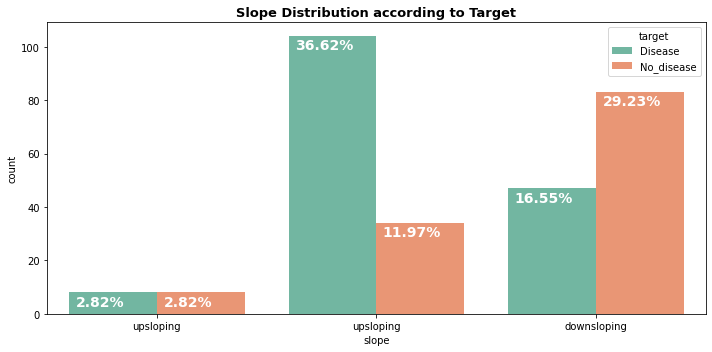

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
name = dt['slope']
ax = sns.countplot(x='slope', hue='target', data=dt, palette='Set2')
ax.set_title("Slope Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

# Plot distributions on continuous variables

given the graph, we observed that under upsloping section there are more diseased than of the healthy patient, and more healthy than of diseased patients under downsloping

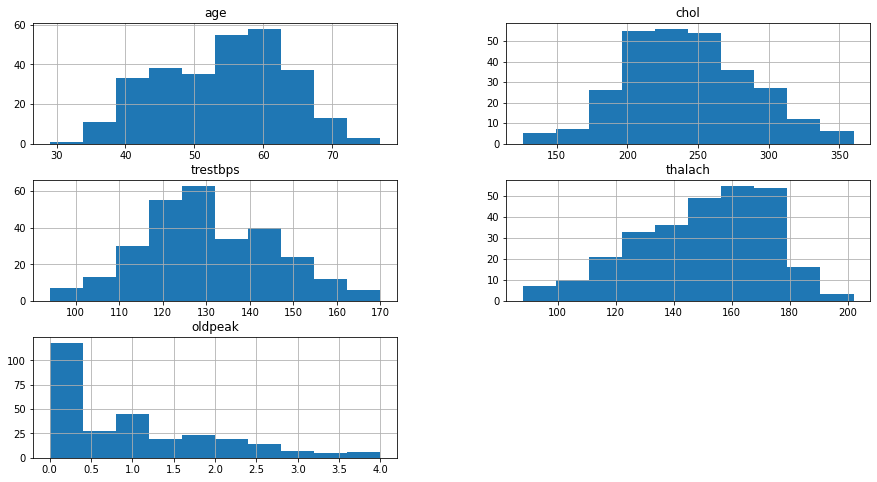

In [42]:
plt.rcParams['figure.figsize'] = (15,8)
dt[['age','chol', 'trestbps','thalach','oldpeak']].hist();




*   normal distribution for: age,trestbps, and closely for chol
*   oldpeak is left-skewed
* thalach is right skewed



# Sns pairplot to visualize the distribution

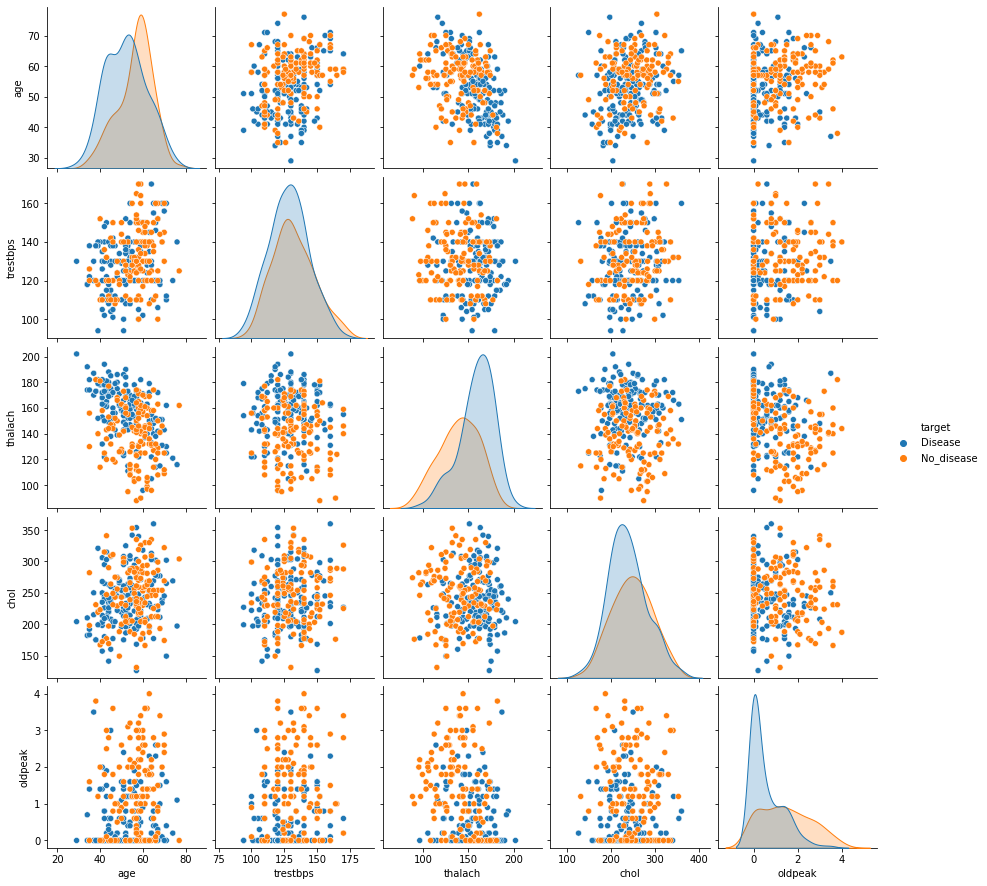

In [43]:
sns.pairplot(dt[['age', 'trestbps', 'thalach','chol','oldpeak', 'target']], hue='target',
             height=2.5);



*   oldpeak has a linear separation realtion between the disease and non-disease.
*   thalach has a mild separation relation between disease and non-disease
* as for other features they do not form clear separation



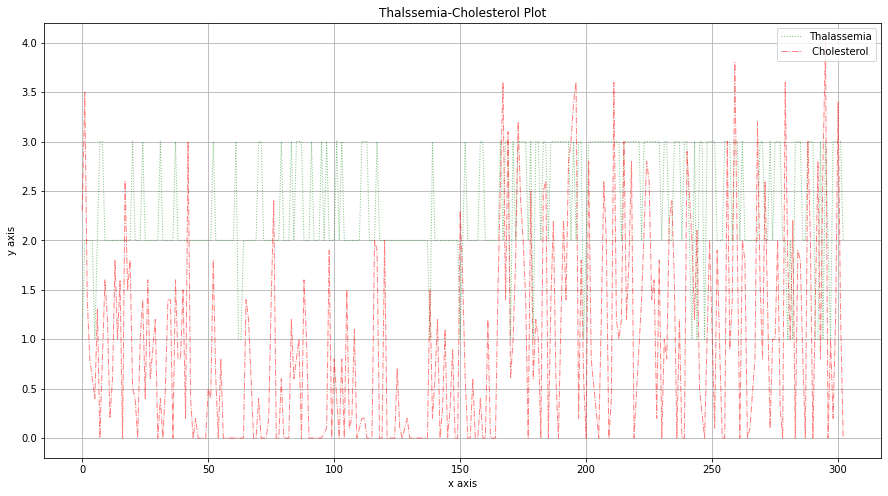

In [44]:
dt_vz.thal.plot(kind = 'line', color = 'g', label = 'Thalassemia', linewidth =1,
             alpha = 0.5, grid = True, linestyle = ':')
dt.oldpeak.plot(color = 'r', label = ' Cholesterol', linewidth =1, alpha =0.5,
                grid = True, linestyle ='-.')

plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Thalssemia-Cholesterol Plot')
plt.show()

A blood disorder called 'Thalassemia
(3 = normal, 6= fixed defect, 7 = reversable )

#Scatter Plot
Visualization with **Scatter plot** relation of **age** and **Cholesterol**

Text(0.5, 1.0, 'Age-Cholesterol Plot')

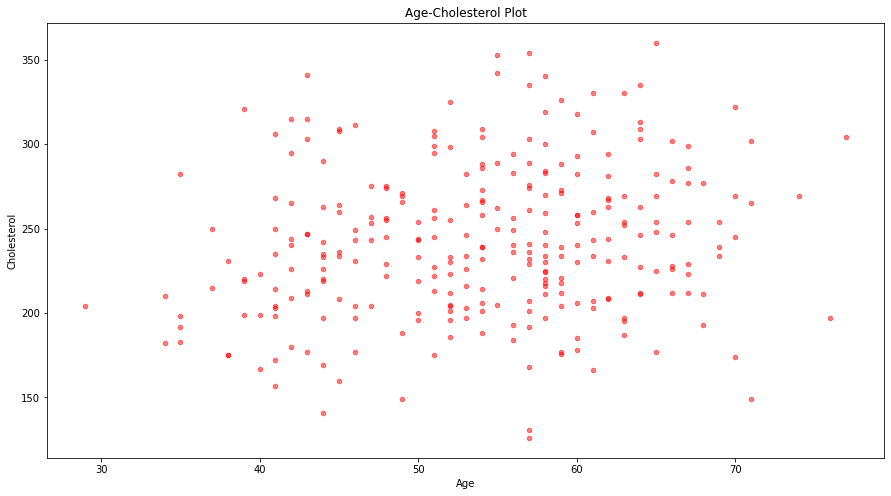

In [45]:
dt.plot(kind = 'scatter', x ='age', y = 'chol',
        alpha = 0.5, color = 'red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot')

# Histogram
**Age frequency**

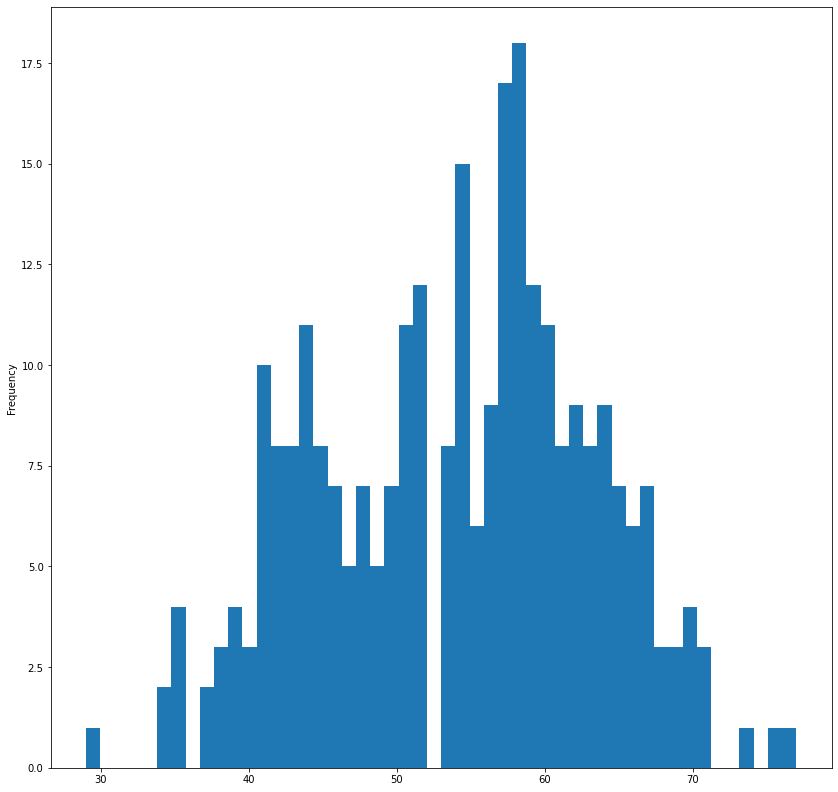

In [46]:
dt.age.plot(kind='hist', bins =50, figsize=(14,14))
plt.show()

# Feature Selection
Feature selection is the process where we manually or automatically we select features that contribute mostly to our prediction variable $y_i$ our output basically selecting feature $X_is$ that will assist us in predicting $Y$ whether the patient is  (1 = sick or 0 = not sick). having irrelevant features in our data can decrease the accuracy of our models and make our models learn vased on irrelevant features. 

In [47]:
#suppose we make our target 'age' to guess the risk heart disease
X = dt_vz.iloc[:,1:14] #independent columns except age
#target column
y = dt_vz.iloc[:,0]

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)# inbuilt class

[0.03842806 0.06752058 0.14422659 0.1548438  0.03010348 0.05391933
 0.15728815 0.03165099 0.1192299  0.05813766 0.06342917 0.05337259
 0.02784969]


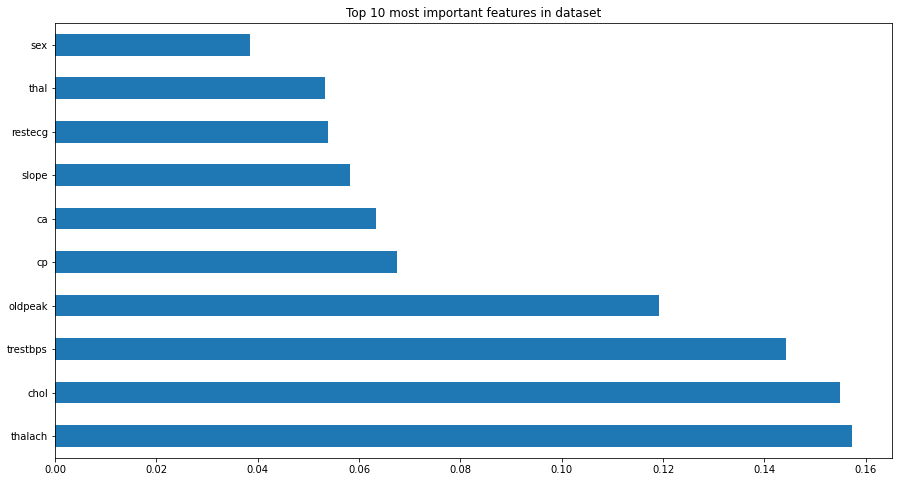

In [49]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 most important features in dataset')
plt.show()

from the graph above, we can deduce that, chol, thalach, trestbps, oldpeak and cp (maybe ca) are the most important features for heart disease prediction



now lets try our problem  by guessing the risk heart disease according to cp values, so in the next case our target is'cp'

In [50]:
x_dt = dt_vz.drop(['cp'], axis =1)
X = x_dt.iloc[:,0:13] #independent columns except cp
y = dt_vz.iloc[:,2] #target column cp

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.11744245 0.02985437 0.12537694 0.10841877 0.02460969 0.04294728
 0.12849474 0.07180131 0.09703338 0.05129787 0.05805891 0.04664078
 0.09802351]


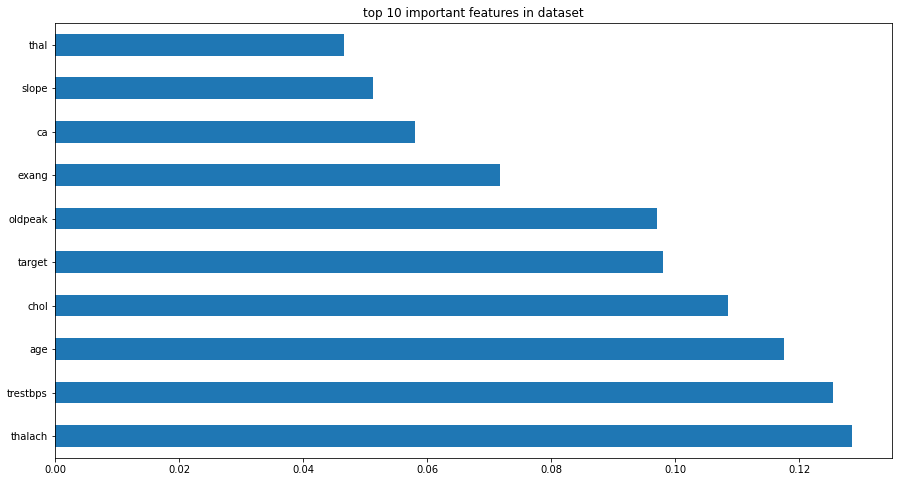

In [52]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('top 10 important features in dataset')
plt.show()


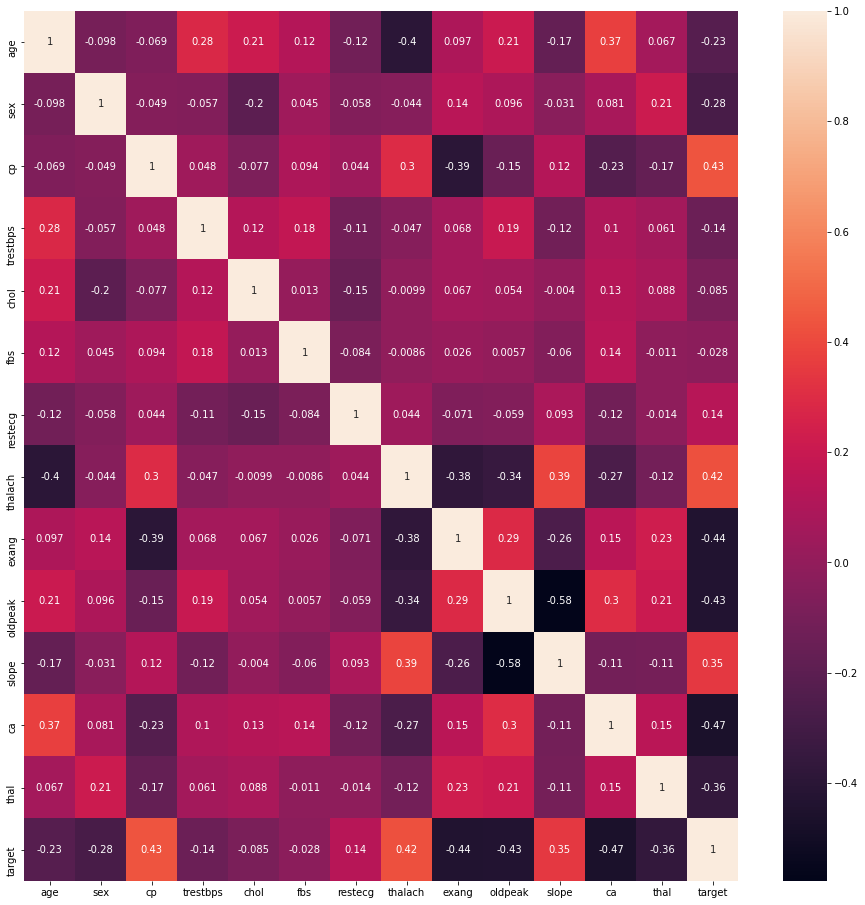

In [53]:
#Using heatmap
X = x_dt.iloc[:,0:13]
y = dt_vz.iloc[:,2]
corrmat = dt_vz.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g = sns.heatmap(dt_vz[top_corr_features].corr(),annot=True,
                cmap = 'rocket')

given heatmap and feature importance above, we can also deduce that thalach, trestbps,age,chol,oldpeak,target, exang are most important features for this problem.

Feature importance basically gives us a score for each feature of our data, the higher the score more important or relevant feature towards our output (or prediction) $y_i$ variable

In [54]:
x_dt = dt_vz.drop(['target'], axis =1)
X = x_dt.iloc[:,0:12] #independent columns except target
y = dt_vz.iloc[:,13] #target column target


In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.07608456 0.06700603 0.12459404 0.06954724 0.06908527 0.02089965
 0.03307048 0.09504432 0.11115435 0.08825734 0.08656933 0.15868738]


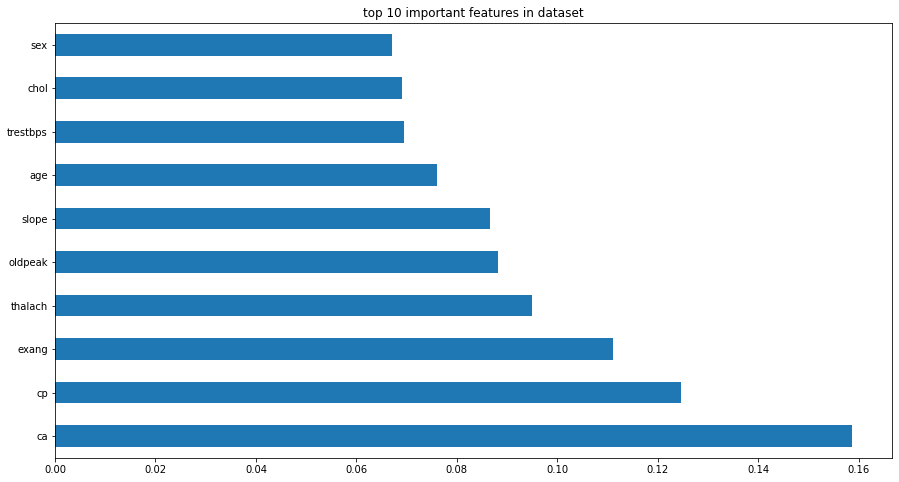

In [56]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('top 10 important features in dataset')
plt.show()


given above, we can use 10 features $X_is$ to predict our target variable $Y_i$

# Classification Models
In this section we use inbuilt models from Scikit-Learn to predict our target variable and output our accuracy
there are numerous different classification algorithms, of which we will not go into depth. Among these classifiers are


*   K-Nearest Neighbors
*   Support Vector Machines
*   Decision Tree Classifier/Random Forests
*   Naive Bayes
*   Linear Discriminant Analysis
*   Logistic Regression

for the purpose of this project we will only choose three of the above..

if one wants to learn a lot of literature on how various classifiers work and some brief explainations of them can be found at https://scikit-learn.org/stable/user_guide.html



In [57]:
dt_vz.drop(['target'], axis =1)
x_dt.iloc[:,0:12] #independent columns except target
#dt.iloc[:,13] #target column target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0


In [58]:
dt_vz.target #target column target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Standardizing the data

In [59]:
x_dt = dt_vz.drop(['target'], axis =1)
x = x_dt.iloc[:,0:12]
y = dt_vz.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

Text(0.5, 1.0, 'Feature distribution after scaling')

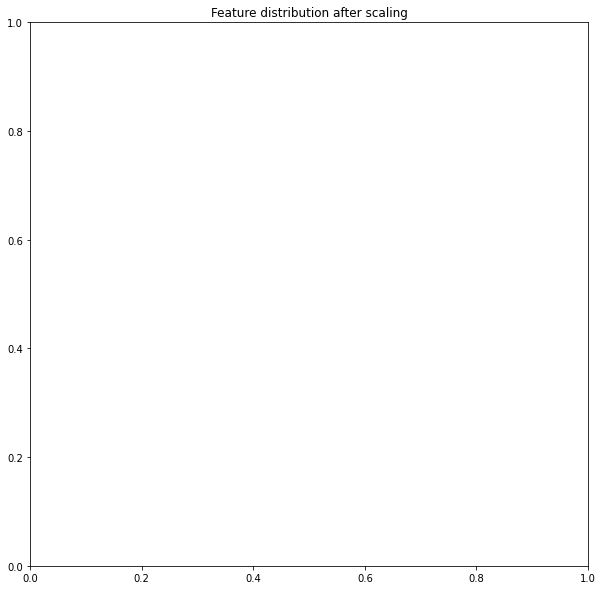

In [60]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
fig = plt.subplots(ncols=1, figsize=(10,10))
sns.kdeplot(dt=x_train)
plt.title('Feature distribution after scaling')

In [61]:
from sklearn.svm import SVC
model = SVC(random_state = 1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Classification Report for Support Vector Machine')
print(classification_report(y_test, y_pred))

Classification Report for Support Vector Machine
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.90      0.95      0.92        39

    accuracy                           0.90        61
   macro avg       0.90      0.88      0.89        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
# save the model to disk
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# Support vector machine
Support vector macghine is a supervised ML algorithm which is used for classification and regression challenges. However it is mostly used in classification problems. in SVM algorithm, each data is plotted as a point in n-dimensional space(number of features selected) with value of feature being the value of a particular co-ordinate(not done in this project).

**Advantages**


*   works really well with a clear margin of separation
*   very effective in high dimensional spaces
* effective in cases where the number of dimensions is greater than the number of samples
* uses susbsets of train points in the decision function

**Cons**


*   does not perform well when we have large dataset because of the required training time is higher
*   does not perform well, when the data has more noise for example when the target classes are overlapping





In [62]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(random_state = 1)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
print('Classification report for logistic Regression')
print(classification_report(y_test, y_pred_2))

Classification report for logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.93      0.95      0.94        39

    accuracy                           0.92        61
   macro avg       0.91      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
# save the model to disk
filename = 'model_2.sav'
pickle.dump(model_2, open(filename, 'wb'))

# Logistic Regression
Logistic regression is appropriate regression analysis to conduction when dependent variable is binary (or dichotomous).
like all regression analyses, the logistic regression is a predictive analysis, which is used to descrive data and explain relation between one dependent binary variable and one or more nominal,ordinal, interval or ratio-level independent variables.

Binary Logistic Regression Major Assumptions
* dependent variable should be dichotomous in nature
* no outliers in the data, which can be assesed by converting the continuous predictors to standardized scores
* no multicollinearity among predictors.
Tabachnick and Fidell (2013) suggests that as long correlation coefficents among independent variables < 0.90 the assumption is met.

**Advantages**

* logistics regression is easier to implement, interpret, and very efficient to train
* makes no assumption about distributions of classes in feature space.
* extend to multiple classes and natural probabilistic view of class predictions

**Disadvantages**

* if number of observations is less than the of features, it may lead to overfitting
* constructs linear boundaries
* major limitation of Logistic regression is the assumption of linearity between the dependent variable and independent variables


In [63]:
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier(random_state = 1)
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)
print('classification report for DTC')
print(classification_report(y_test, y_pred_3))

classification report for DTC
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        22
           1       0.76      0.74      0.75        39

    accuracy                           0.69        61
   macro avg       0.66      0.67      0.67        61
weighted avg       0.69      0.69      0.69        61



In [ ]:
# save the model to disk
filename = 'model_3.sav'
pickle.dump(model_3, open(filename, 'wb'))

# Decision Tree Classifier
decision trer is a simple representation for classifying  examples. it is a supervied Machine learning where the data is continuously split according to a certain paramter.

**Advantages**

* useful for decision-related problems.
* find all the possible outcomes for a given problem.
* there is a very littel need for data cleaning in decision trees compared to other machine learning algorithms.

**Disadvantages**

* too many layers of decision tree make it extremely somtimes
* results in overfitting
* more number of class labels, computational complexity of the decision tree increases

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


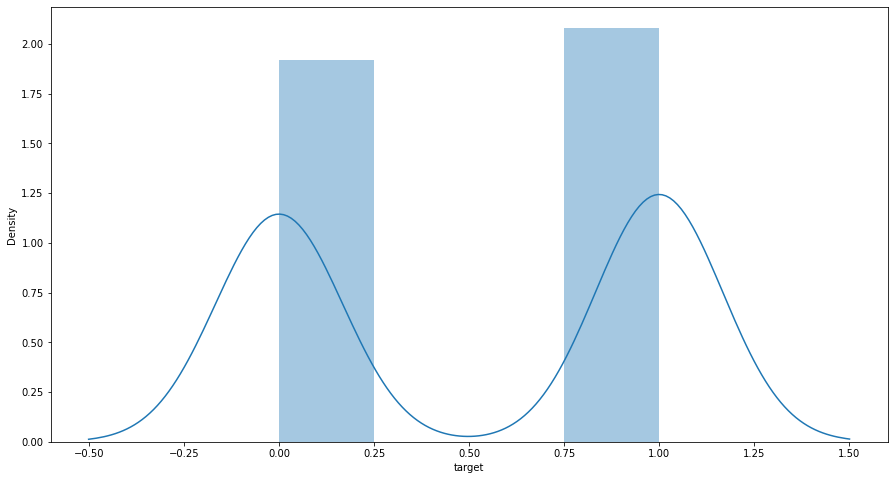

In [64]:
sns.distplot(y_train)

In [65]:
x_train = x_dt.iloc[:,0:12]

In [66]:
x_tr = T.shared(np.array(x_train))
y_tr = T.shared(np.array(y_train))

In [67]:
with pm.Model() as LinearModel:
  #Priors
  w_0 = pm.Normal('Inter', mu=0, sigma= 10,)
  w = pm.Normal('weights', mu=0, sigma=10, shape=(12,1))
  sigma = pm.HalfCauchy('sigma', 50)

  #Computing Mean
  mu = pm.Deterministic('mu', w_0 + T.tensor.dot(x_tr, w))
  #Likelihood
  y_ob = pm.Normal('y_ob', mu=mu, sigma=sigma, observed = y_tr)
  trace = pm.sample(4000, tune = 2000)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, weights, Inter]


Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 1278 seconds.


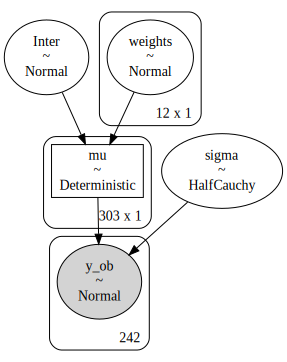

In [68]:
pm.model_to_graphviz(LinearModel)

In [69]:
with LinearModel:
  #compute maximum posteriori estimate
  manual_map_estimate = pm.find_MAP

In [70]:
manual_map_estimate

<function pymc3.tuning.starting.find_MAP>

In [71]:
with LinearModel:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Inter,0.52,0.03,0.47,0.57,0.0,0.0,4934.27,4642.22,1.0
"weights[0,0]",0.00,0.00,-0.00,0.00,0.0,0.0,6275.23,5881.17,1.0
"weights[1,0]",0.00,0.00,-0.01,0.01,0.0,0.0,7639.25,6021.93,1.0
"weights[2,0]",-0.00,0.00,-0.00,0.00,0.0,0.0,7794.53,6003.23,1.0
"weights[3,0]",0.00,0.00,-0.00,0.00,0.0,0.0,7432.45,5924.41,1.0
...,...,...,...,...,...,...,...,...,...
"mu[298,0]",0.52,0.01,0.51,0.53,0.0,0.0,9396.31,6622.38,1.0
"mu[299,0]",0.52,0.01,0.51,0.53,0.0,0.0,7660.43,6331.80,1.0
"mu[300,0]",0.52,0.01,0.51,0.54,0.0,0.0,8742.55,6464.20,1.0
"mu[301,0]",0.52,0.01,0.51,0.53,0.0,0.0,10291.97,6195.62,1.0


In [72]:
pm.trace_to_dataframe(trace).info


<bound method DataFrame.info of          Inter  weights__0_0  weights__1_0  ...  mu__300_0  mu__301_0  mu__302_0
0     0.525823      0.000072      0.001659  ...   0.514355   0.513864   0.519719
1     0.504283      0.000673      0.000279  ...   0.514269   0.516491   0.525648
2     0.521163     -0.000088     -0.002101  ...   0.528835   0.524356   0.522756
3     0.529145      0.000039     -0.003419  ...   0.526907   0.527548   0.519269
4     0.488792      0.000181     -0.001423  ...   0.514913   0.518828   0.522344
...        ...           ...           ...  ...        ...        ...        ...
7995  0.515641     -0.000268      0.000546  ...   0.522102   0.521248   0.524860
7996  0.566966     -0.000079     -0.005449  ...   0.510843   0.521546   0.521910
7997  0.578754      0.000065     -0.005017  ...   0.524154   0.535307   0.524324
7998  0.476863      0.000385      0.004410  ...   0.518140   0.520425   0.512759
7999  0.557190     -0.000127     -0.000939  ...   0.524866   0.528300   0.524

# Convergence
we can visualie the samples over time and their distribution to check the quality of the results

# Computing Credible Intervals

In [73]:
b = trace['Inter']
lb, ub = np.percentile(b, 2.5), np.percentile(b,97.5)
lb, ub = np.exp(lb), np.exp(ub)
print(f'P({lb:.3f}< Odds Ratio < {ub:.3f})= 0.95')

P(1.600< Odds Ratio < 1.771)= 0.95


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


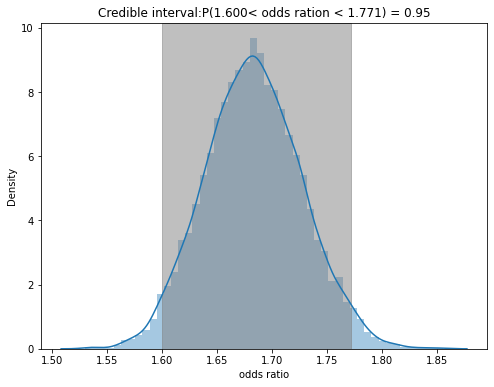

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(np.exp(b), axlabel='odds ratio', ax=ax)
ax.set_title(f'Credible interval:P({lb:.3f}< odds ration < {ub:.3f}) = 0.95')
ax.axvspan(lb, ub, alpha =0.5, color = 'gray')

# Variational Inference(VI)
VI is a machine learning method that approximates probability densities through optimization. according to bayesian context, it approximates the posterior dist as follows:


1.   Select a parametrzed family of probability distributions
2.   find the member of that family that is closest to the target.


compared to monte carlo (MCMC), variatonale Bayes tends to converge faster and scales to large data better, while MCMC approximates the posterior with samples from the chain that will eventually converge arbitarily close to the target, variationale inference is better suited for large datasets and it also quickly explore many models. in contrast, MCMC delivers more accurate results on smaller datasets or when time and computationak resources fewer constraints.

# Run Automatic Differentation Variational inference
under this section we fit() instead of sample() function, with option to include an early stop _checkParametersConvergence_ callback, if the distribution-fittin process converged up to a given tolerance



In [75]:
with LinearModel:
  callback = CheckParametersConvergence(diff='absolute')
  approx = pm.fit(n=6000, callbacks=[callback])

Finished [100%]: Average Loss = 4.836e+05


Persist Result

In [76]:
with open(model_path/'LinearModel.pkl','wb') as buff:
  pickle.dump({'model': LinearModel,
               'approx': approx}, buff)

# Sample from approximated distribution
we can draw samples from the approximated distribution to obtain a trace object

In [77]:
trace_advi = approx.sample(2000)

In [78]:
pm.summary(trace_advi)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Inter,-0.002,0.704,-1.367,1.305,0.016,0.012,1832.0,2022.0,NaN
"weights[0,0]",-0.001,0.558,-1.086,1.016,0.012,0.009,2012.0,2055.0,NaN
"weights[1,0]",0.018,0.672,-1.247,1.209,0.015,0.010,2071.0,2004.0,NaN
"weights[2,0]",0.005,0.703,-1.197,1.381,0.016,0.012,1923.0,1830.0,NaN
"weights[3,0]",0.009,0.418,-0.701,0.886,0.010,0.007,1764.0,1922.0,NaN
...,...,...,...,...,...,...,...,...,...
"mu[298,0]",6.870,118.830,-208.113,229.143,2.647,1.924,2019.0,1848.0,NaN
"mu[299,0]",7.102,118.789,-215.641,221.946,2.634,1.924,2031.0,1840.0,NaN
"mu[300,0]",6.910,115.509,-208.179,218.682,2.546,1.856,2063.0,1811.0,NaN
"mu[301,0]",5.462,92.803,-171.023,174.227,2.059,1.479,2043.0,1718.0,NaN


In [79]:
with LinearModel:
  ppc = pm.sample_posterior_predictive(trace)

y = ppc['y_ob'].mean(axis=0)


credible intevals are the uncertainties in the model parameters, where by it is the domain of the predictive distribution of the posterior probability distribution, however there are vairous methods for detecting CI.
the plots below suggests that the model is 94% confidence within the  interval

In [ ]:
from sklearn.metrics import confusion_matrix
pred = np.array(([1 if x>0.5 else 0 for x in y]))
len(pred[pred==1])/pred.size
confusion_matrix(y_train, pred)

In [ ]:
az.plot_trace(trace)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


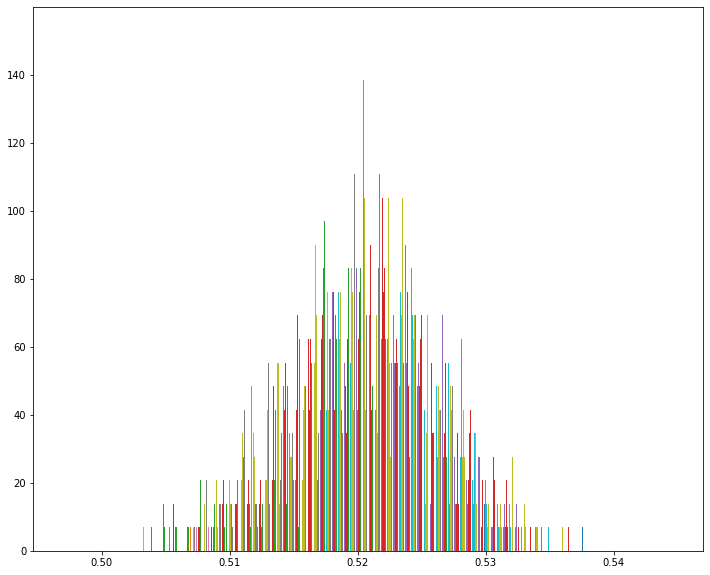

In [80]:
_,ax = plt.subplots(figsize=(12,10))
ax.hist(y, bins =100, density= True)
plt.show()

In [81]:
print(y)

[[0.51373832 0.52316478 0.51823034 ... 0.51801946 0.51446433 0.52364395]
 [0.531276   0.51725823 0.51909008 ... 0.50503533 0.52194247 0.52882941]
 [0.50962388 0.52626223 0.52143212 ... 0.51784304 0.5193926  0.52065044]
 ...
 [0.51490923 0.53479841 0.52117168 ... 0.51363149 0.51861795 0.50877431]
 [0.51284024 0.51668047 0.52113283 ... 0.53063159 0.51535632 0.52058275]
 [0.51529201 0.51032058 0.51826167 ... 0.52564236 0.52852746 0.52093468]]


In [ ]:
az.plot_posterior(trace)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Simply said, where the model is confident enough, we can advice the patient to goto the Doctor about the disease

# MAP Inference
the pymc3 library makes straightfoward to perform approximate Bayesian inference for logist+ic regressiom Logistic regression models the probability that $i$ gets heart disease or not  on the target variable based on $k$ features

Logistic reggresion:

$p$($y_i$ = 1|$\beta$) =$\sigma$ $\beta_0$ + $\beta_x1$ +.... + $\beta_kxik$)

where $\sigma$ is the logistic function:

$\sigma(t)$ = $\frac{1} {1+ e^-1}$



In [ ]:
##with pm.model() as manual_logist_model:
  #intercept = pm.Normal('intercept', 0, sd=10)
 ## beta_1 = pm.Normal('beta_1',0, sd=10, shape(12,1))

  #likelihood = pm.invlogit(intercept+ beta_1)

 # pm.Bernoulli(name='loigt', p=likelihood, observed = y_tr)
 # trace = pm.sample(4000, tune = 2000)